In [1]:
import cartoonpy.editor as ctpy
import numpy as np

In [2]:
duration = 8
fps = 15

In [3]:
def make_frame(t):
    frame = np.zeros((360, 640, 3), dtype='uint8')
    frame[:,:,int((t * fps / 3) % 3)] = int(255 * t / duration)
    return frame

In [4]:
video_clip = ctpy.VideoClip(make_frame=make_frame, duration=duration).set_fps(fps)


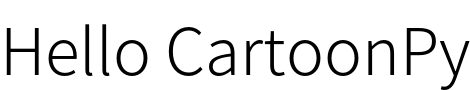

In [5]:
text_clip = ctpy.TextClip('Hello CartoonPy', fontsize=64)
text_clip.ipython_display()

In [6]:
# tts_clip 需要配置 config_default.py 中的tok变量
hello_str = '''
非常欢迎来到百晓通客栈，卡通派编辑器捧场，
这里是卡通派的首个测试Demo——Hello CartoonPy！
'''
tts_clip = ctpy.AudioTTSClip(hello_str)

In [7]:
final_clip = ctpy.CompositeVideoClip([video_clip,
                                      text_clip.set_pos('center')])
final_clip = final_clip.set_duration(duration).margin(10, color=(128,0,128))
# tts_clip 需要配置 config_default.py 中的tok变量
final_clip.audio = tts_clip
final_clip.ipython_display()

 99%|█████████▉| 120/121 [00:04<00:00, 27.21it/s]
